# Median Gross Rent in Florida (2015-2019)



## Abstract
Where in Florida is rent affordable? What does rent look like and how has rent changed in Florida from 2015 to 2019? This notebook looks at the median gross rent estimates at a county level in the state of Florida from 2015-2019. 
#### The Census Bureau defines Gross Rent as "the contract rent plus the estimated average monthly cost of utilities (electricity, gas, water and sewer) and fuels (oil, coal, kerosene, wood, etc.)." 
The source of the data is the U.S. Census Bureau's API, so data after 2019 is not yet available. This data has already been web-scraped and uploaded to the notebook in the form of 5 .csv files (one for each year). 
The code will read, clean, format, and filter the data. It will then analyze, by year, all the counties' Median Gross Rents and determine if they are affordable to single-person and 2-person households earning a minimum-wage income. Affordable is defined as being able to pay rent with no more than 30% of the monthly salary. Afterwards, the counties with the highest rents acroess all 5 years are subsetted and used for visual plots and analyses. 

## Scraping the Data 
#### The following steps walk you through the process of how I scraped the census data. This notebook assumes that steps 1-7 below have already been completed.      
1. Install and load the following modules:
        pip install us
        pip install census
        import pandas as pd
        from census import Census
        from us import states

2. The Census Bureau’s API requires an API key that can be obtained here: https://api.census.gov/data/key_signup.html. Your key will be emailed to you as a 40 digit text string. Once obtained, pass it through the Census() function and store it in a variable (I called mine 'c'). This variable  will be used when scraping the 5 data sets we want.
    c = Census("my_key_here")   
3. Now we want to get our Median Gross Rent variable. The B25031_001 variable is the Census Bureau's name for the Median Gross Rent. Thousands of other Census variables can be obtained in the American Community Survey site: https://api.census.gov/data/2019/acs/acs5/variables.html. 
4. Now that we have all needed fields to import the data, we proceed with running the following code (note that this yields one data set for the year 2015. This chunk is run 5 times with the 'year' parameter adjusted):
        fl_rent2015 = c.acs1.state_county(fields = ('NAME', 'B25031_001E'),
                                              state_fips = states.FL.fips,
                                              county_fips = "*",
                                              year = 2015)
                                      
5. Create a dataframe from the census data:
        fl_rent2015_df = pd.DataFrame(fl_rent2015)
6. Steps 4 and 5 are repeated for years 2016, 2017, 2018, and 2019. The resulting 5 dataframes are saved as local .csv files using the following code:
        from google.colab import files
        fl_rent2015_df.to_csv('FLrent2015.csv') 
        files.download('FLrent2015.csv')
        fl_rent2016_df.to_csv('FLrent2016.csv') 
        files.download('FLrent2016.csv')
        fl_rent2017_df.to_csv('FLrent2017.csv') 
        files.download('FLrent2017.csv')
        fl_rent2018_df.to_csv('FLrent2018.csv') 
        files.download('FLrent2018.csv')
        fl_rent2019_df.to_csv('FLrent2019.csv') 
        files.download('FLrent2019.csv')
7. Now we have our data stored and it is ready to upload to Vocareum and use in this notebook.    

## Reading, Cleaning and Formatting the Data 

In [2]:
#### This code cell reads in our 5 data sets. We then make a note of their shapes(number of rows, columns)
# import pandas module 
import pandas as pd 

# making dataframe for 2015-2019 rent data
df2015 = pd.read_csv("FLrent2015.csv") 
df2016 = pd.read_csv("FLrent2016.csv") 
df2017 = pd.read_csv("FLrent2017.csv") 
df2018 = pd.read_csv("FLrent2018.csv") 
df2019 = pd.read_csv("FLrent2019.csv") 

df2015.shape
df2016.shape
df2017.shape
df2018.shape
df2019.shape


(41, 5)

* Keep in mind that our 2015 frame has 40 rows, and the rest have 41 rows. We use this fact later during analyses. 

To see what we're working with, lets look at the first data set for the year 2015. 

In [3]:
display(df2015.head())

,Unnamed: 0,NAME,B25031_001E,state,county
0,0,"Escambia County, Florida",880.0,12,33
1,1,"Hernando County, Florida",915.0,12,53
2,2,"Hillsborough County, Florida",990.0,12,57
3,3,"Okaloosa County, Florida",1066.0,12,91
4,4,"Duval County, Florida",975.0,12,31


We can fix it up a little bit. The "clean" fucntion below is applied to all 5 data sets. 

In [4]:
import re
def clean(df):
    # Rename columns
    df2 = df.rename(columns={'B25031_001E': 'Median Gross Rent',
                             'NAME': 'County',
                             'county': 'CountyID'})
    # Delete columns we don't need
    del df2['Unnamed: 0'] 
    # Change state value from 12 to 'FL'
    df2['state'] = 'FL'
    # Remove ",Florida" from 'County' column
    pattern = re.compile(', Florida')
    df2["County"] = df2["County"].str.replace(pattern,"")
    # Sort alphabetically by county
    df2 = df2.sort_values(by = 'County', ascending=True, ignore_index = False)
    return df2

df2015 = clean(df2015)
df2016 = clean(df2016)
df2017 = clean(df2017)
df2018 = clean(df2018)
df2019 = clean(df2019)
    
    
display(df2015[0:5])

,County,Median Gross Rent,state,CountyID
27,Alachua County,863.0,FL,1
39,Bay County,982.0,FL,5
35,Brevard County,976.0,FL,9
33,Broward County,1256.0,FL,11
28,Charlotte County,932.0,FL,15


That looks much better. Now lets dive deeper into our 2015 data set.

### Investigating Minimum Wage in 2015

As of January 1, 2015, the Florida minimum wage was $8.05. Is this enough to cover the median gross rent? Is this enough to pay the median rent with no more than 30% of one's total monthly income?

8.05 hourly pay x 8 hours/day x 30 days/month = 1932 each month (before tax deductions)

1932 x 30% = 579.6

So it is recommended to spend no more than 579.6 on rent. 

In [5]:
import numpy as np
df2015['Min wage enough'] = np.where(df2015['Median Gross Rent'] <= 579.6, True, False)
len(df2015[df2015['Min wage enough']== True])

0

The table above has length 0 hence it is empty. So the minimum wage is not enough for a single person to cover rent for ANY county in Florida. 
Out of curiosity, what if there are two people living in the housing structure working a minimum wage job?

8.05 hourly pay x 8 hours/day x 30 days/month = 1932 each month (before tax deductions)
1932 salary/person x 2 people = 3864 each month combied

3864 x 30% = 1159.2

So it is recommended to spend no more than 1159.2 on rent.

In [6]:
df2015['Min wage enough for 2'] = np.where(df2015['Median Gross Rent'] <= 1159.2, True, False)
df2015.head()
len(df2015[df2015['Min wage enough for 2']== True])

34

So based on the 'Min wage enough for 2' column, there are 34 out of 40 counties where two people's combined income is enough to cover the Median Gross Rent. Which counties remain unaffordable?

In [7]:
df2015[df2015['Min wage enough for 2']== False]

,County,Median Gross Rent,state,CountyID,Min wage enough,Min wage enough for 2
33,Broward County,1256.0,FL,11,False,False
15,Collier County,1177.0,FL,21,False,False
12,Miami-Dade County,1162.0,FL,86,False,False
34,Monroe County,1441.0,FL,87,False,False
10,Palm Beach County,1241.0,FL,99,False,False
11,St. Johns County,1213.0,FL,109,False,False


So the 6 counties in the table above seem to be the most unaffordable. Will this persist after 2015? Let's see what happens in 2016. 

### Investigating Minimum Wage in 2016
In 2016, the Florida minimum wage was $8.05 (same as 2015). Is this enough to cover the median gross rent? Is this enough to pay the median rent with no more than 30% of one's total monthly income?

8.05 hourly pay x 8 hours/day x 30 days/month = 1932 dollars earned each month (before tax deductions)

1932 x 30% = 579.6 dollars

So it is recommended to spend no more than 579.6 on rent. Our results might be the same to last years', depending on how much Medium Gross Rent changed. Let's see. 


In [8]:
df2016['Min wage enough'] = np.where(df2016['Median Gross Rent'] <= 579.6, True, False)
len(df2016[df2016['Min wage enough']== True])

0

Our prediction was correct; Just like in 2015, there exists no county where the Median Gross Rent can be covered by 30% of the minimum wage. 

What about a 2 person household?

In [9]:
df2016['Min wage enough for 2'] = np.where(df2016['Median Gross Rent'] <= 1159.2, True, False)
len(df2016[df2016['Min wage enough for 2']== True])

33

Based on the 'Min wage enough for 2' variable above, there are 33 out of 41 counties in 2016 where two people's combined income is enough to cover the Median Gross Rent. Which counties remain unaffordable in 2016?

In [10]:
df2016[df2016['Min wage enough for 2']== False]

,County,Median Gross Rent,state,CountyID,Min wage enough,Min wage enough for 2
35,Broward County,1296.0,FL,11,False,False
13,Collier County,1230.0,FL,21,False,False
8,Miami-Dade County,1201.0,FL,86,False,False
36,Monroe County,1677.0,FL,87,False,False
2,Nassau County,1177.0,FL,89,False,False
6,Palm Beach County,1303.0,FL,99,False,False
32,Sarasota County,1182.0,FL,115,False,False
7,St. Johns County,1246.0,FL,109,False,False


### Investigating Minimum Wage in 2017
In 2017, the Florida minimum wage was $8.10. Is this enough to cover the median gross rent? Is this enough to pay the median rent with no more than 30% of one's total monthly income?

8.10 hourly pay x 8 hours/day x 30 days/month = 1944 dollars earned each month (before tax deductions)

1944 x 30% = 583.2

So in 2017, it was recommended to spend no more than 583.2 dollars on rent. 
* Results below are similar to the previous years' results; no county's Median Gross Rent can be covered by 30% of the minimum wage. 

In [11]:
df2017['Min wage enough'] = np.where(df2017['Median Gross Rent'] <= 583.2, True, False)
len(df2017[df2017['Min wage enough']== True])

0

What about a two-person household?

In [12]:
df2017['Min wage enough for 2'] = np.where(df2017['Median Gross Rent'] <= 1166.4, True, False)
len(df2017[df2017['Min wage enough for 2']== True])

30

 Based on the 'Min wage enough for 2' variable above, there are 30 out of 41 counties where two people's combined income is enough to cover the Median Gross Rent. Which counties remain unaffordable in 2017?

In [13]:
df2017[df2017['Min wage enough for 2']== False]

,County,Median Gross Rent,state,CountyID,Min wage enough,Min wage enough for 2
35,Broward County,1328.0,FL,11,False,False
20,Collier County,1281.0,FL,21,False,False
14,Flagler County,1179.0,FL,35,False,False
12,Miami-Dade County,1290.0,FL,86,False,False
36,Monroe County,1550.0,FL,87,False,False
15,Osceola County,1183.0,FL,97,False,False
9,Palm Beach County,1349.0,FL,99,False,False
29,Sarasota County,1206.0,FL,115,False,False
11,Seminole County,1202.0,FL,117,False,False
10,St. Johns County,1296.0,FL,109,False,False


### Investigating Minimum Wage in 2018
In 2018, the Florida minimum wage was $8.25. Is this enough to cover the median gross rent? Is this enough to pay the median rent with no more than 30% of one's total monthly income?

8.25 hourly pay x 8 hours/day x 30 days/month = 1980 dollars earned each month (before tax deductions)

1980 x 30% = 594

So in 2018, it was recommended to spend no more than 594 dollars on rent. 
* Results below are similar to the previous years'; no county's Median Gross Rent can be covered by 30% of the minimum wage. 

In [14]:
df2018['Min wage enough'] = np.where(df2018['Median Gross Rent'] <= 594, True, False)
len(df2018[df2018['Min wage enough']== True])

0

What about a two-person household?

In [15]:
df2018['Min wage enough for 2'] = np.where(df2018['Median Gross Rent'] <= 1188, True, False)
len(df2018[df2018['Min wage enough for 2']== True])

29

Based on the 'Min wage enough for 2' variable above, there are 29 out of 41 counties where two people's combined income is enough to cover the Median Gross Rent. Which counties remain unaffordable in 2018?

In [16]:
df2018[df2018['Min wage enough for 2']== False]

,County,Median Gross Rent,state,CountyID,Min wage enough,Min wage enough for 2
35,Broward County,1372.0,FL,11,False,False
4,Collier County,1257.0,FL,21,False,False
3,Lee County,1190.0,FL,71,False,False
1,Miami-Dade County,1349.0,FL,86,False,False
36,Monroe County,1691.0,FL,87,False,False
26,Orange County,1219.0,FL,95,False,False
23,Osceola County,1296.0,FL,97,False,False
0,Palm Beach County,1369.0,FL,99,False,False
30,Sarasota County,1359.0,FL,115,False,False
20,Seminole County,1244.0,FL,117,False,False


### Investigating Minimum Wage in 2019
In 2019, the Florida minimum wage was $8.46. Is this enough to cover the median gross rent? Is this enough to pay the median rent with no more than 30% of one's total monthly income?

8.46 hourly pay x 8 hours/day x 30 days/month = 2030.4 earned each month (before tax deductions)

2030.4 x 30% = 609.12

So in 2019, it was recommended to spend no more than 609.12 on rent. 
* Results below are similar to the previous years'; no county's Median Gross Rent can be covered by 30% of the minimum wage.

In [17]:
df2019['Min wage enough'] = np.where(df2019['Median Gross Rent'] <= 609.12, True, False)
len(df2019[df2019['Min wage enough']== True])

0

What about a two-person household?

In [18]:
df2019['Min wage enough for 2'] = np.where(df2019['Median Gross Rent'] <= 1218.24, True, False)
len(df2019[df2019['Min wage enough for 2']== True])

29

Based on the 'Min wage enough for 2' variable above, there are 29 out of 41 counties where two people's combined income is enough to cover the Median Gross Rent. That is, MGR is less than or equal to 30% of the combined income of a 2-peroson home. Which counties remained unaffordable in 2019?

In [19]:
df2019[df2019['Min wage enough for 2']== False]

,County,Median Gross Rent,state,CountyID,Min wage enough,Min wage enough for 2
25,Broward County,1448.0,FL,11,False,False
33,Collier County,1397.0,FL,21,False,False
12,Flagler County,1423.0,FL,35,False,False
32,Lee County,1220.0,FL,71,False,False
30,Miami-Dade County,1408.0,FL,86,False,False
26,Monroe County,1540.0,FL,87,False,False
16,Orange County,1322.0,FL,95,False,False
13,Osceola County,1317.0,FL,97,False,False
29,Palm Beach County,1498.0,FL,99,False,False
20,Sarasota County,1354.0,FL,115,False,False


Note that both analyses performed (single person and 2-person household) followed these assumptions when calculating monthly salaries: 
1. People are paid the exact minimum wage value
2. People work 30 days/month
3. Tax deductions are ignored 

## Putting it All Together: 
### Which counties remained consistently unaffordable from 2015-2019?

Using our results from the previous sections, lets find the intersection of the most unaffordable counties for all 5 years.

In [20]:
unaffordable = set(df2019[df2019['Min wage enough for 2']== False]['County']).intersection(
               set(df2018[df2018['Min wage enough for 2']== False]['County']),
               set(df2017[df2017['Min wage enough for 2']== False]['County']),
               set(df2016[df2016['Min wage enough for 2']== False]['County']),
               set(df2015[df2015['Min wage enough for 2']== False]['County']))
print(unaffordable) 


{'Monroe County', 'Miami-Dade County', 'Palm Beach County', 'Collier County', 'St. Johns County', 'Broward County'}


So Palm Beach County, Miami-Dade County, Collier County, Monroe County, St. Johns County, and Broward County all had unaffordable Medium Gross Rents across all 5 years, from 2015-2019. Let's get a concrete idea of where these counties are located. 
The code below yields a map of Florida, with these 6 counties highlighted. 

In [21]:
import geopandas as gpd
from shapely import wkt
# Get Florida County Information (already uploaded)
fl_county = pd.read_csv('fl_county.csv')
fl_county['geometry'] = fl_county['geometry'].apply(wkt.loads)
fl_county = gpd.GeoDataFrame(fl_county, crs='epsg:32617')
# Subset it to the 6 counties of interest
fl_county_high_MGR = fl_county[(fl_county['NAME'] == 'Monroe') |
                               (fl_county['NAME'] =='Palm Beach')|
                               (fl_county['NAME'] =='Collier')|
                               (fl_county['NAME']== 'St. Johns')|
                               (fl_county['NAME'] =='Miami-Dade')|
                               (fl_county['NAME'] == 'Broward')]


([], [])

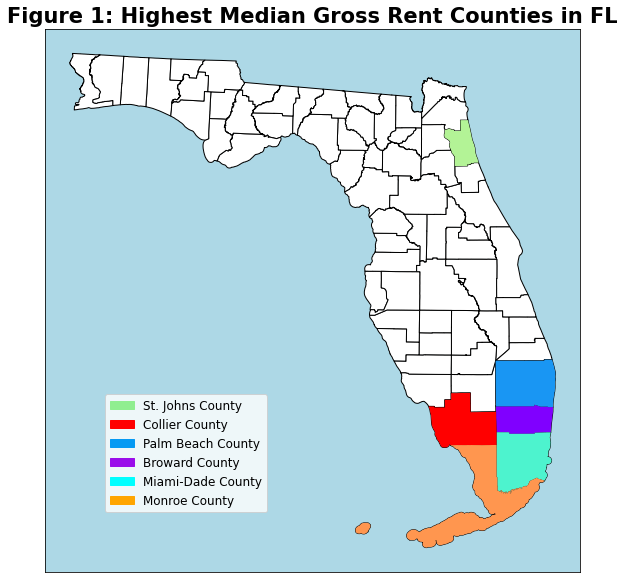

In [49]:
# https://geopandas.org/en/latest/docs/user_guide/mapping.html for guidance 
# import modules for plotting
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (20, 10))

# Plot the state of Florida and its county boundaries in black
fl_county.plot(ax=ax, color='white', edgecolor='black')
# Plot the 6 unaffordable counties of interest
fl_county_high_MGR.plot(ax=ax, marker='o',cmap = "rainbow", markersize=5)

# Create legend
red_patch = mpatches.Patch(color='red', label='Collier County')
purple_patch = mpatches.Patch(color='xkcd:violet', label='Broward County')
cyan_patch = mpatches.Patch(color='cyan', label='Miami-Dade County')
green_patch = mpatches.Patch(color='lightgreen', label='St. Johns County')
blue_patch = mpatches.Patch(color='xkcd:azure', label='Palm Beach County')
orange_patch = mpatches.Patch(color='orange', label='Monroe County')

plt.legend(handles=[green_patch, red_patch, blue_patch, purple_patch, cyan_patch, orange_patch ],
           loc = 'lower left',
           fontsize = 12,
           bbox_to_anchor=(.1, .1))

# Change background color and add title
ax.set_facecolor("lightblue")
plt.title('Figure 1: Highest Median Gross Rent Counties in FL', fontdict = {'fontsize': '21', 'fontweight' : 'bold'})

# Disable ticks by setting them to an empty list
plt.xticks([]) 
plt.yticks([]) 

Now lets look at some time series data on these 6 counties. We will combine our 5 data sets and plot the Medium Gross Rent each year for the most unaffordsable counties from 2015-2019. 

In [23]:
# Add 'Year' column to each set
df2015['Year'] = 2015
df2016['Year'] = 2016
df2017['Year'] = 2017
df2018['Year'] = 2018
df2019['Year'] = 2019
# Combine the 4 sets
pieces = (df2015,df2016,df2017,df2018,df2019)
combined = pd.concat(pieces, ignore_index = True)
display(combined)

,County,Median Gross Rent,state,CountyID,Min wage enough,Min wage enough for 2,Year
0,Alachua County,863.0,FL,1,False,True,2015
1,Bay County,982.0,FL,5,False,True,2015
2,Brevard County,976.0,FL,9,False,True,2015
3,Broward County,1256.0,FL,11,False,False,2015
4,Charlotte County,932.0,FL,15,False,True,2015
...,...,...,...,...,...,...,...
199,St. Johns County,1334.0,FL,109,False,False,2019
200,St. Lucie County,1196.0,FL,111,False,True,2019
201,Sumter County,1185.0,FL,119,False,True,2019
202,Volusia County,1074.0,FL,127,False,True,2019


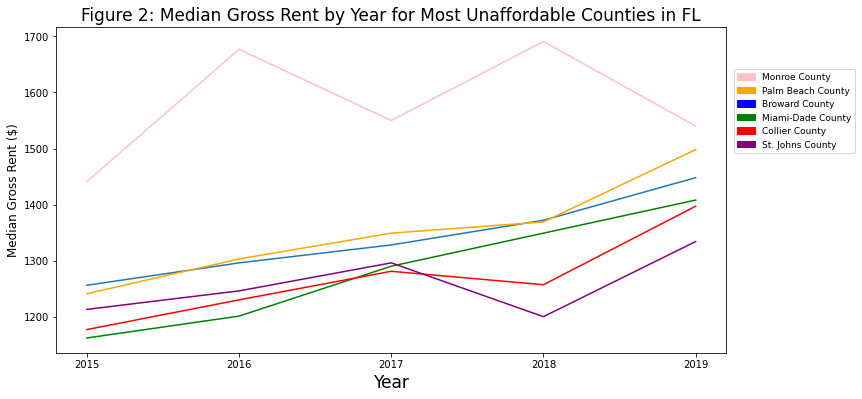

In [48]:
combined['MGR'] = combined['Median Gross Rent']

# For each county, plot it's MGR for each year
plt.plot(combined[combined['County']=='Broward County'].Year, 
         combined[combined['County']=='Broward County'].MGR)
plt.plot(combined[combined['County']=='Miami-Dade County'].Year, 
         combined[combined['County']=='Miami-Dade County'].MGR, 
         color = 'green')
plt.plot(combined[combined['County']=='Collier County'].Year, 
         combined[combined['County']=='Collier County'].MGR, 
         color = 'red')
plt.plot(combined[combined['County']=='St. Johns County'].Year, 
         combined[combined['County']=='St. Johns County'].MGR, 
         color = 'purple')
plt.plot(combined[combined['County']=='Palm Beach County'].Year, 
         combined[combined['County']=='Palm Beach County'].MGR, 
         color = 'orange')
plt.plot(combined[combined['County']=='Monroe County'].Year, 
         combined[combined['County']=='Monroe County'].MGR, 
         color = 'pink')
# Add title, fix labels and size
plt.title('Figure 2: Median Gross Rent by Year for Most Unaffordable Counties in FL',fontsize = 17)
plt.xlabel('Year',fontsize = 17)
plt.ylabel('Median Gross Rent ($)',fontsize = 12)
plt.rcParams["figure.figsize"] = (12,6)
default_x_ticks = [2015,2016,2017,2018,2019]
plt.xticks(default_x_ticks)

# Create legend to distinguish counties
red_patch = mpatches.Patch(color='red', label='Collier County')
blue_patch = mpatches.Patch(color='blue', label='Broward County')
green_patch = mpatches.Patch(color='green', label='Miami-Dade County')
purple_patch = mpatches.Patch(color='purple', label='St. Johns County')
orange_patch = mpatches.Patch(color='orange', label='Palm Beach County')
pink_patch = mpatches.Patch(color='pink', label='Monroe County')

plt.legend(handles=[pink_patch,orange_patch,blue_patch,green_patch,red_patch,purple_patch],
           loc = 'lower right',
           fontsize = 9,
           bbox_to_anchor=(1.2, 0.6))

Some observations from the plot above:
- We can see an overall upwards trend in rent for all 6 counties.
- Monroe County has significantly higher rent prices than the other counties. 
- Miami-Dade County and its neighboring Broward County have no obvious drops or increases in rent.  
- Something intresting to notice is that 3 of the counties (Palm Beach, Collier, and St. Johns) had a drop in rent in 2018, while Monroe County had an increase. We do not have enough data to conclude this, but based on these 5 years, Monroe County appears to also have a cyclical pattern: rent increases one year and decreases the next. Further research should include more past data, perhaps up to the year 2005. This will confirm or deny Monroe County's trend and pattern, as well as determing any other patterns in the other counties. 













Now we will calculate the average Median Gross Rent across all 5 years for each of these counties, and plot them in a bar graph.

Text(0, 0.5, 'Avg Median Gross Rent ($)')

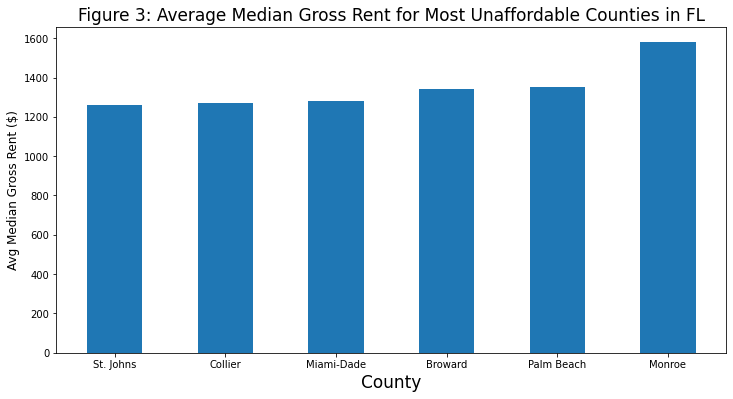

In [112]:
# Create dictionary where keys are the counties, and the values are the corresponing rent averages.
avg_rents = {}
for c in unaffordable:
    current = combined[combined['County'] == c]
    avg_rents[c] = current['MGR'].mean()

# Loop through dictionary and create 2-D array of county and average values
data = []
for c in avg_rents:
    data.append([c, avg_rents[c]])  
    
# Turn array into dataframe    
df = pd.DataFrame(data, columns=['County', 'Mean MGR'])

# Make names shorter so it's more legible in the bar graph
pattern = re.compile(' County')
df["County"] = df["County"].str.replace(pattern,"")

# Plot the bar graph
df = df.sort_values(by = 'Mean MGR', ascending=True, ignore_index = False)
plt.bar(df['County'],df['Mean MGR'],width=0.5)
# Add title and labels
plt.title('Figure 3: Average Median Gross Rent for Most Unaffordable Counties in FL',fontsize = 17)
plt.xlabel('County',fontsize = 17)
plt.ylabel('Avg Median Gross Rent ($)',fontsize = 12)

- As expected, Monroe County has the highest average Median Gross rent. 
- What suprises me is that Broward County has a higher average than Miami-Dade. As a Broward County native, I've persoanlly witnessed higher rent in Miami-Dade county. 



Figure 3 above doesn't show much else. It might be  more useful to compare the averages used in Figure 3 with the averages, across all 5 years, of the other counties that were determined to be affordable for a 2-person household. Let's plot all the averages below. 

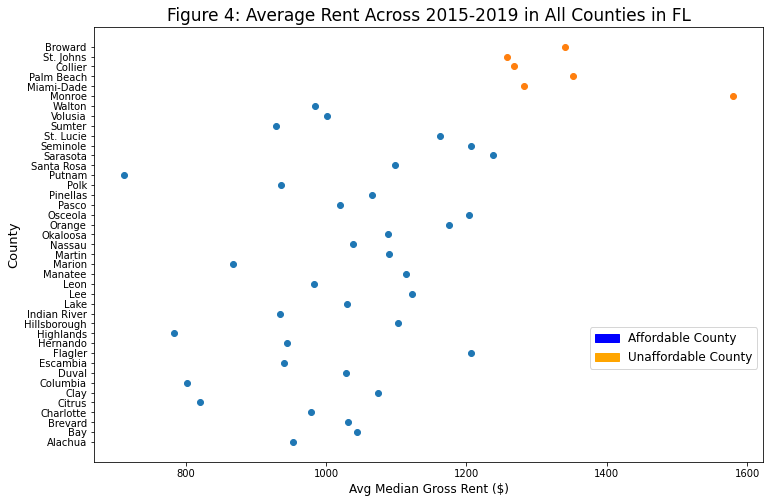

In [126]:
affordable = combined[(combined['County']!='Broward County')&
                                (combined['County']!='Miami-Dade County')&
                                (combined['County']!='Collier County')&
                                (combined['County']!='St. Johns County')&
                                (combined['County']!='Monroe County')&
                                (combined['County']!='Palm Beach County')]
# Make columns easier to read
pattern = re.compile(' County')
affordable2 = affordable.copy()
affordable2["County"] = affordable["County"].str.replace(pattern,"")
# Get averages
grouped = affordable2.groupby("County")
afford_counties = []
avgs = []
for key, item in grouped:
    afford_counties.append(key)
    avgs.append(grouped.get_group(key)['MGR'].mean())
# Plot values     
plt.scatter(y = afford_counties, x = avgs)
plt.scatter(y = ['Monroe', 'Miami-Dade', 'Palm Beach', 'Collier', 'St. Johns', 'Broward'], 
            x = (avg_rents.values()))
# Add title and labels
plt.title('Figure 4: Average Rent Across 2015-2019 in All Counties in FL',fontsize = 17)
plt.ylabel('County',fontsize = 13)
plt.xlabel('Avg Median Gross Rent ($)',fontsize = 12)
plt.tick_params(axis='y', labelsize=10)
plt.rcParams["figure.figsize"] = (12,8)
# Add legend
orange_patch = mpatches.Patch(color='orange', label='Unaffordable County')
blue_patch = mpatches.Patch(color='blue', label='Affordable County')

plt.legend(handles=[blue_patch,orange_patch,],
           loc = 'lower right',
           fontsize = 12,
           bbox_to_anchor=(1,.2))

Figure 4 shows more information than Figure 3. Here we can visually see the differences in average rents between our two populations: counties with affordable rent (for a 2-person household) and counties with unaffordable rent. A cluster of orange dots is evident.

Now lets plot the Gross Rents for each county for each year in a grouped bar graph. The code below accomplishes this. 

In [29]:
# Set up code for the grouped bar chart
combined_expensive = combined[(combined['County']=='Broward County')|
                                (combined['County']=='Miami-Dade County')|
                                (combined['County']=='Collier County')|
                                (combined['County']=='St. Johns County')|
                                (combined['County']=='Monroe County')|
                                (combined['County']=='Palm Beach County')]


broward = combined_expensive[combined_expensive['County'] == 'Broward County'] 
miami = combined_expensive[combined_expensive['County'] == 'Miami-Dade County'] 
collier = combined_expensive[combined_expensive['County'] == 'Collier County'] 
johns = combined_expensive[combined_expensive['County'] == 'St. Johns County'] 
monroe = combined_expensive[combined_expensive['County'] == 'Monroe County'] 
palm = combined_expensive[combined_expensive['County'] == 'Palm Beach County'] 

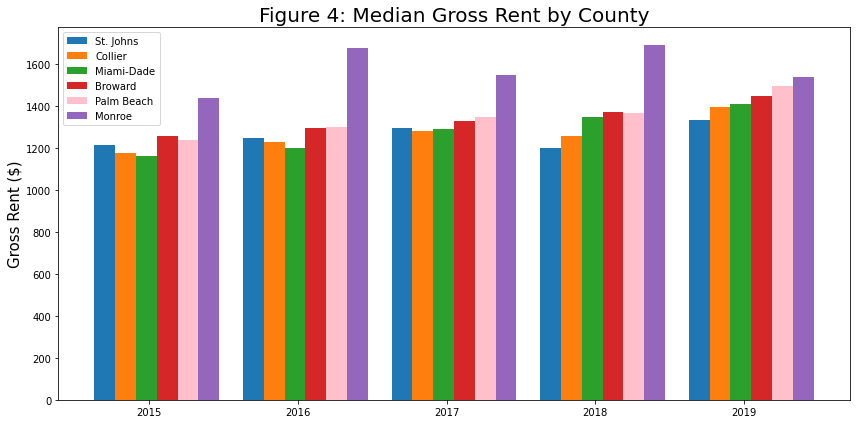

In [51]:
# Plot the grouped bar chart
labels = ['2015', '2016', '2017', '2018', '2019']
x = np.arange(len(labels))  # the label locations
width = 0.14  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, list(johns['MGR']), width, label='St. Johns')
rects2 = ax.bar(x + width, list(collier['MGR']), width, label='Collier')
rects3 = ax.bar(x + width*2, list(miami['MGR']), width, label='Miami-Dade')
rects4 = ax.bar(x + width*3, list(broward['MGR']), width, label='Broward')
rects5 = ax.bar(x + width*4, list(palm['MGR']), width, label='Palm Beach',color = 'pink')
rects6 = ax.bar(x + width*5, list(monroe['MGR']), width, label='Monroe')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Gross Rent ($)',fontsize = 15)
ax.set_title('Figure 5: Median Gross Rent by County',fontsize = 20)
ax.set_xticks([0.3,1.3,2.3,3.3,4.3],labels)
ax.legend()
fig.tight_layout()
plt.show()

Some insight gained from Figure 5 is that Monroe County's rent is much higher than the other counties' rents up until 2019. In 2019, the differences seem to level out. I would be curious to see what this looks like in 2020 once that data is available. 

## Conclusion

- Using our data, assumptions, and limitations, we did find the counties with the highest Median Gross Rents.
I'd like to do further statistical tests and get the confidence level behind our findings, i.e., we can say that these 6 counties are the most expensive in Florida with x% confidence. 

- All in all, there is a positive trend on rent prices. 
- A single-person household earning a minimum wage salary cannot afford rent in ANY county in Florida.
- Something I found was that the most expensive counties in Florida are located in south Florida, with the exception of St. Johns County. 

- Future research may also use income data instead of minimum wage data; this can provide further insights on affordability in Florida; it should also use more recent census data as it becomes available. 